# CNN Fundamentals — Assignment  
**Submitter Name:** Aasif Majeed  
**Date:** 23 Oct 2024  

This notebook answers all questions from the **CNN Fundamentals** assignment.  
It includes:
- Each question written with its number (as in the PDF)
- Detailed explanations with intuitive examples
- Small NumPy demos for image representation, convolution, padding/stride output size, and pooling


## Q1) Explain the basic components of a digital image and how it is represented in a computer. State the differences between grayscale and color images.


### What is a digital image?
A **digital image** is a discrete (sampled) representation of a continuous scene. Computers store images as **arrays (matrices)** of numbers.  
Each number describes the **intensity** (brightness) or **color** at a specific location called a **pixel**.

### Basic components of a digital image
1. **Pixels (picture elements)**  
   - The smallest addressable unit in an image grid.
   - Each pixel has a value that represents intensity (grayscale) or color (RGB).

2. **Spatial resolution (width × height)**  
   - Example: 256×256 image has 65,536 pixels.
   - Higher resolution → more detail (but more memory).

3. **Channels (depth)**  
   - Grayscale: 1 channel (intensity).
   - Color: usually 3 channels (Red, Green, Blue).  
   - Some images include **alpha** (transparency), giving 4 channels (RGBA).

4. **Bit depth (how many values per pixel)**  
   - 8-bit grayscale: pixel values in [0, 255].  
   - 16-bit images allow a wider range.
   - Higher bit depth → smoother gradients, more dynamic range.

### Representation in a computer
An image is stored as a NumPy-like array:

- **Grayscale image**: shape = `(H, W)`  
  Example: `img[10, 20] = 128` means pixel at row 10 col 20 has mid-level intensity.

- **Color (RGB) image**: shape = `(H, W, 3)`  
  Example: `img[10, 20] = [255, 0, 0]` → bright red at that pixel.

### Grayscale vs Color: key differences
| Aspect | Grayscale | Color (RGB) |
|---|---|---|
| Channels | 1 | 3 (R,G,B) |
| Array shape | (H, W) | (H, W, 3) |
| Pixel meaning | intensity only | mixture of red/green/blue |
| Memory | lower | ~3× more than grayscale |
| Use cases | medical scans, edge detection, some CV preprocessing | natural images, object recognition, segmentation |

**Intuition:** grayscale tells “how bright”; color tells “how bright in red, green, and blue components.”


## Q2) Define Convolutional Neural Networks (CNNs) and discuss their role in image processing. Describe the key advantages of using CNNs over traditional neural networks for image-related tasks.


### What is a CNN?
A **Convolutional Neural Network (CNN)** is a type of neural network designed specifically to process **grid-like data**, especially **images**.  
CNNs use **convolutional layers** (learnable filters/kernels) to automatically learn spatial features such as:
- edges
- textures
- corners
- shapes
- object parts

### Role in image processing
CNNs are used in:
- **Image classification** (cat vs dog, digit recognition)
- **Object detection** (finding bounding boxes)
- **Segmentation** (pixel-level labeling)
- **Face recognition**
- **Medical imaging** (tumor detection)
- **Super-resolution / denoising**

CNNs learn features directly from data, replacing manual feature engineering (e.g., SIFT/HOG in classic computer vision).

### Why CNNs are better than traditional (fully-connected) neural networks for images
A traditional dense neural network (MLP) treats the input as a flat vector and loses spatial structure. CNNs keep and exploit the 2D/3D structure.

**Key advantages:**
1. **Local connectivity**
   - A filter looks at a small neighborhood (e.g., 3×3), matching the fact that nearby pixels are strongly related.

2. **Parameter sharing (same filter used across the image)**
   - Greatly reduces parameters.
   - A 3×3 filter has only 9 weights (per channel), regardless of image size.

3. **Translation equivariance**
   - If an object shifts, convolution responses shift similarly.
   - Helps detect patterns anywhere in the image.

4. **Hierarchical feature learning**
   - Early layers learn edges, middle layers learn textures/parts, deeper layers learn object-level concepts.

5. **Better generalization & efficiency**
   - Fewer parameters → less overfitting and faster training compared to dense networks on images.

**Example:**  
For a 64×64×3 image:
- Flattened input = 12,288 features. A dense layer with 1,000 neurons would need ~12 million weights.
- CNN filters reuse weights and need far fewer parameters to learn meaningful visual features.


## Q3) Define convolutional layers and their purpose in a CNN. Discuss the concept of filters and how they are applied during the convolution operation. Explain the use of padding and strides in convolutional layers and their impact on the output size.


### Convolutional layer (Conv layer)
A **convolutional layer** applies multiple small learnable matrices (**filters/kernels**) to an input image/feature map to produce new **feature maps**.

**Purpose:**
- Extract spatial features like edges and textures.
- Build more complex features across layers.

### Filters (kernels) and convolution operation
A **filter** is a small matrix, e.g., 3×3, 5×5.
The filter slides across the image, computing a dot product at each position:

\[
\text{output}(i,j) = \sum_{u}\sum_{v} \text{input}(i+u, j+v)\cdot \text{kernel}(u,v)
\]

- Each filter learns to detect a specific pattern (horizontal edges, vertical edges, texture, etc.).
- Using **multiple filters** produces multiple output feature maps.

### Stride
**Stride (S)** is how many pixels the filter moves each step.
- Stride 1: move one pixel at a time (dense scanning).
- Stride 2: skip every other pixel (downsamples output).

**Effect:** Higher stride → smaller output and faster computation, but may lose fine detail.

### Padding
**Padding (P)** adds extra border around the input (often zeros).
- Without padding, output shrinks after convolution.
- With padding, we can control output size and keep border information.

Common padding styles:
- **Valid padding:** P = 0 (no padding) → output smaller
- **Same padding:** choose P so output size ≈ input size (often for stride 1)

### Output size formula
For input size \(N\), kernel size \(K\), padding \(P\), stride \(S\):

\[
\text{Output size} = \left\lfloor \frac{N - K + 2P}{S} \right\rfloor + 1
\]

For 2D images, apply the formula to height and width separately.

**Example:** Input 32×32, K=3, S=1  
- Valid padding (P=0): output = 30×30  
- Same padding (P=1): output = 32×32  


## Q4) Describe the purpose of pooling layers in CNNs. Compare max pooling and average pooling operations.


### What is pooling?
A **pooling layer** reduces the spatial resolution (height/width) of feature maps by summarizing local neighborhoods.

### Purpose of pooling
1. **Downsampling**
   - Reduces computation and memory.
2. **Makes features more robust**
   - Small translations/noise have less effect (approx. translation invariance).
3. **Helps reduce overfitting**
   - Fewer activations, simpler representation.

Pooling usually works on small windows like 2×2 with stride 2.

### Max pooling vs Average pooling
| Pooling type | Operation | Effect | When it helps |
|---|---|---|---|
| **Max pooling** | take maximum value in window | keeps strongest activation (feature presence) | common default for feature detection |
| **Average pooling** | take average value in window | smooths feature map | useful when overall intensity matters; used in global average pooling |

**Intuition:**
- Max pooling asks: “Is this feature present anywhere in this region?”
- Average pooling asks: “How strong is this feature on average in this region?”


---
# Code Demos (NumPy)
These short demos are included to make the theory concrete.
---
## Demo 1: Grayscale vs RGB representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


Grayscale shape: (2, 3)
[[  0  50 100]
 [150 200 255]]

RGB shape: (2, 3, 3)
[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[255 255   0]
  [  0 255 255]
  [255   0 255]]]


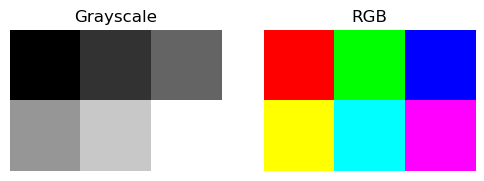

In [2]:
# Grayscale image: H x W
gray = np.array([[0,  50, 100],
                 [150, 200, 255]], dtype=np.uint8)

# RGB image: H x W x 3 (R,G,B)
rgb = np.array([[[255, 0,   0],   [0, 255, 0],   [0, 0, 255]],
                [[255,255, 0],   [0, 255,255],  [255,0,255]]], dtype=np.uint8)

print("Grayscale shape:", gray.shape)
print(gray)
print("\nRGB shape:", rgb.shape)
print(rgb)

plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rgb)
plt.title("RGB")
plt.axis("off")
plt.show()


## Demo 2: A simple 2D convolution (edge-detection style)
We convolve a 5×5 image with a 3×3 kernel (valid padding).

Input image shape: (5, 5)
Kernel shape: (3, 3)
Output (valid) shape: (3, 3)
[[ 40.  80. 120.]
 [ 40.  80. 120.]
 [  0.   0.   0.]]


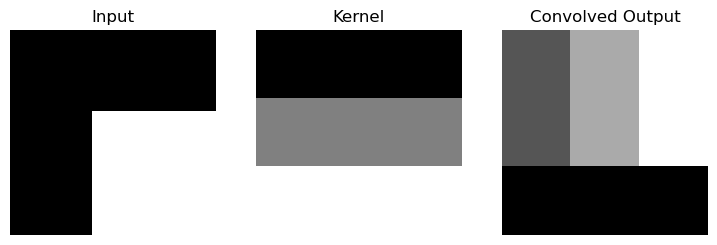

In [3]:
def conv2d_valid(image, kernel):
    """Simple valid (no padding) 2D convolution for demo purposes."""
    H, W = image.shape
    kH, kW = kernel.shape
    outH = H - kH + 1
    outW = W - kW + 1
    out = np.zeros((outH, outW), dtype=float)
    for i in range(outH):
        for j in range(outW):
            patch = image[i:i+kH, j:j+kW]
            out[i, j] = np.sum(patch * kernel)
    return out

img = np.array([
    [10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10],
    [10, 10, 50, 50, 50],
    [10, 10, 50, 50, 50],
    [10, 10, 50, 50, 50],
], dtype=float)

kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1],
], dtype=float)

out = conv2d_valid(img, kernel)

print("Input image shape:", img.shape)
print("Kernel shape:", kernel.shape)
print("Output (valid) shape:", out.shape)
print(out)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Input")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(kernel, cmap="gray")
plt.title("Kernel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(out, cmap="gray")
plt.title("Convolved Output")
plt.axis("off")
plt.show()


## Demo 3: Output size with padding and stride
We implement:

\[\text{out} = \left\lfloor \frac{N - K + 2P}{S} \right\rfloor + 1\]

and test a few cases.

In [4]:
import math

def out_size(N, K, P=0, S=1):
    return math.floor((N - K + 2*P)/S) + 1

cases = [
    {"N": 32, "K": 3, "P": 0, "S": 1, "desc": "valid, stride 1"},
    {"N": 32, "K": 3, "P": 1, "S": 1, "desc": "same-ish, stride 1"},
    {"N": 32, "K": 3, "P": 1, "S": 2, "desc": "stride 2 (downsample)"},
    {"N": 28, "K": 5, "P": 0, "S": 1, "desc": "valid 5x5"},
]

for c in cases:
    print(c["desc"], "=> out =", out_size(c["N"], c["K"], c["P"], c["S"]))


valid, stride 1 => out = 30
same-ish, stride 1 => out = 32
stride 2 (downsample) => out = 16
valid 5x5 => out = 24


## Demo 4: Max pooling vs Average pooling
We pool a 4×4 feature map using 2×2 windows with stride 2.

In [5]:
def max_pool2x2(mat):
    out = np.zeros((mat.shape[0]//2, mat.shape[1]//2))
    for i in range(0, mat.shape[0], 2):
        for j in range(0, mat.shape[1], 2):
            out[i//2, j//2] = np.max(mat[i:i+2, j:j+2])
    return out

def avg_pool2x2(mat):
    out = np.zeros((mat.shape[0]//2, mat.shape[1]//2))
    for i in range(0, mat.shape[0], 2):
        for j in range(0, mat.shape[1], 2):
            out[i//2, j//2] = np.mean(mat[i:i+2, j:j+2])
    return out

feat = np.array([
    [1,  2,  3,  4],
    [5,  6,  7,  8],
    [9, 10, 11, 12],
    [13,14, 15,16]
], dtype=float)

mx = max_pool2x2(feat)
av = avg_pool2x2(feat)

print("Feature map:\n", feat)
print("\nMax pool 2x2 stride2:\n", mx)
print("\nAvg pool 2x2 stride2:\n", av)


Feature map:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]

Max pool 2x2 stride2:
 [[ 6.  8.]
 [14. 16.]]

Avg pool 2x2 stride2:
 [[ 3.5  5.5]
 [11.5 13.5]]
